In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('BA_reviews.csv')
df.head()

,Reviews,Overall Ratings,Recommended,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,Sentiment
0,✅ Trip Verified | This time British Airways ...,9,yes,5.0,5.0,4.0,4.0,5.0,4.0,5,Positive
1,"✅ Trip Verified | The seats were excellent, ...",9,yes,5.0,4.0,3.0,5.0,4.0,NaN,5,Positive
2,✅ Trip Verified | After the nightmare of get...,5,no,4.0,1.0,2.0,3.0,4.0,NaN,3,Positive
3,✅ Trip Verified | Prior to boarding a gate a...,3,no,4.0,1.0,NaN,NaN,2.0,NaN,2,Negative
4,✅ Trip Verified | I flew from Amsterdam to L...,1,no,3.0,3.0,3.0,3.0,1.0,NaN,1,Negative


In [29]:
not_na = df.notna().sum()
na = df.isna().sum()
print(not_na)
print("\n")
print(na)
print("\n")
print(not_na + na)  # This is just the total rows


Reviews                   1000
Overall Ratings           1000
Recommended               1000
seat_comfort               913
cabin_staff_service        903
food_and_beverages         780
inflight_entertainment     520
ground_service             944
wifi_and_connectivity      321
value_for_money           1000
Sentiment                 1000
dtype: int64


Reviews                     0
Overall Ratings             0
Recommended                 0
seat_comfort               87
cabin_staff_service        97
food_and_beverages        220
inflight_entertainment    480
ground_service             56
wifi_and_connectivity     679
value_for_money             0
Sentiment                   0
dtype: int64


Reviews                   1000
Overall Ratings           1000
Recommended               1000
seat_comfort              1000
cabin_staff_service       1000
food_and_beverages        1000
inflight_entertainment    1000
ground_service            1000
wifi_and_connectivity     1000
value_for_money     

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Reviews                 1000 non-null   object 
 1   Overall Ratings         1000 non-null   int64  
 2   Recommended             1000 non-null   object 
 3   seat_comfort            913 non-null    float64
 4   cabin_staff_service     903 non-null    float64
 5   food_and_beverages      780 non-null    float64
 6   inflight_entertainment  520 non-null    float64
 7   ground_service          944 non-null    float64
 8   wifi_and_connectivity   321 non-null    float64
 9   value_for_money         1000 non-null   int64  
 10  Sentiment               1000 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 86.1+ KB


In [37]:
numerical_cols = ['Overall Ratings', 'seat_comfort',
       'cabin_staff_service', 'food_and_beverages', 'inflight_entertainment',
       'ground_service', 'wifi_and_connectivity', 'value_for_money']

# mean = df[numerical_cols].mean().round()
# print(mean)

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean().round())

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Reviews                 1000 non-null   object 
 1   Overall Ratings         1000 non-null   int64  
 2   Recommended             1000 non-null   object 
 3   seat_comfort            1000 non-null   float64
 4   cabin_staff_service     1000 non-null   float64
 5   food_and_beverages      1000 non-null   float64
 6   inflight_entertainment  1000 non-null   float64
 7   ground_service          1000 non-null   float64
 8   wifi_and_connectivity   1000 non-null   float64
 9   value_for_money         1000 non-null   int64  
 10  Sentiment               1000 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 86.1+ KB


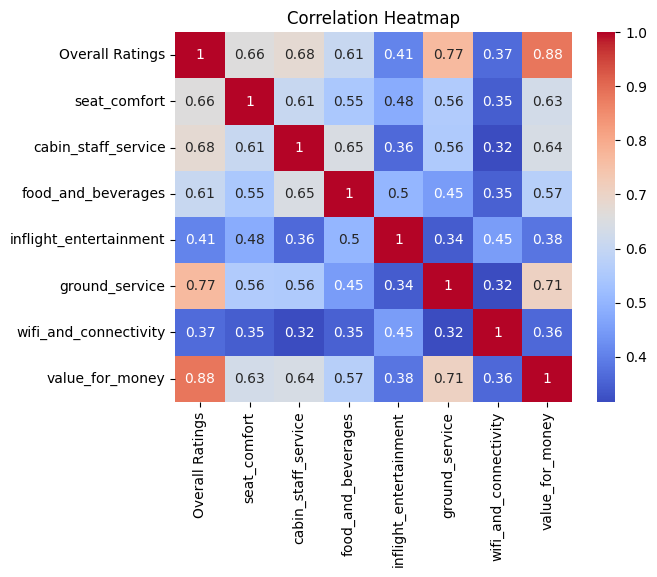

In [ ]:
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


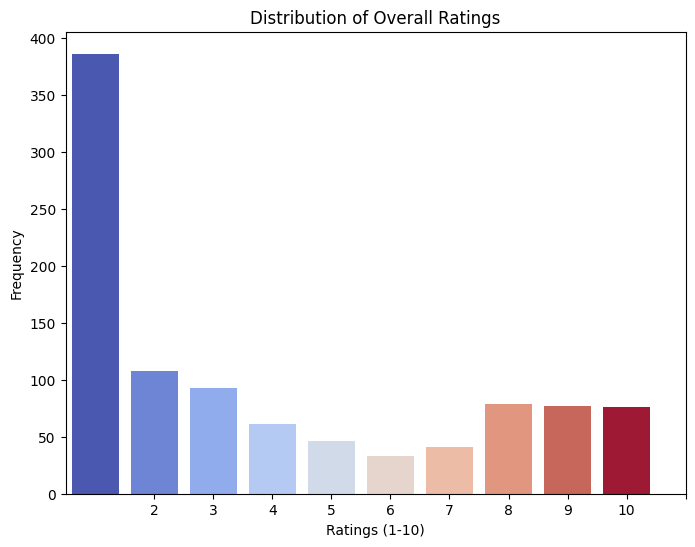

In [73]:
rating_counts = df["Overall Ratings"].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette="coolwarm", legend=False)

plt.xticks(range(1, 11))  # Ensure x-axis has labels 1-10
plt.xlabel("Ratings (1-10)")
plt.ylabel("Frequency")
plt.title("Distribution of Overall Ratings")
plt.show()

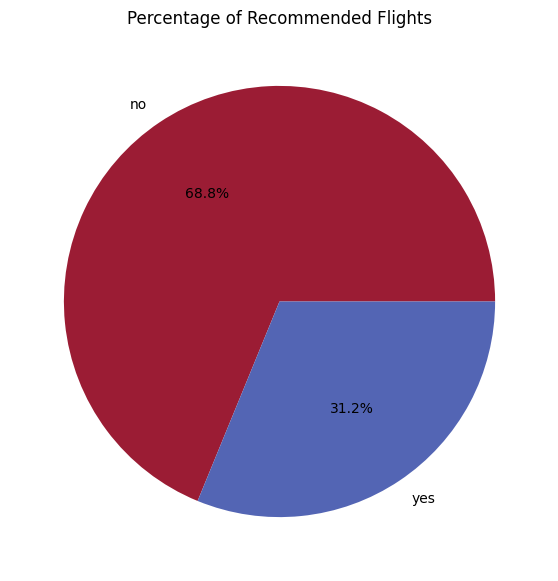

In [75]:
# Count values
recommend_counts = df["Recommended"].value_counts()

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(recommend_counts, labels=recommend_counts.index, autopct="%1.1f%%", colors=["#9b1c34","#5365b4"])
plt.title("Percentage of Recommended Flights")
plt.show()


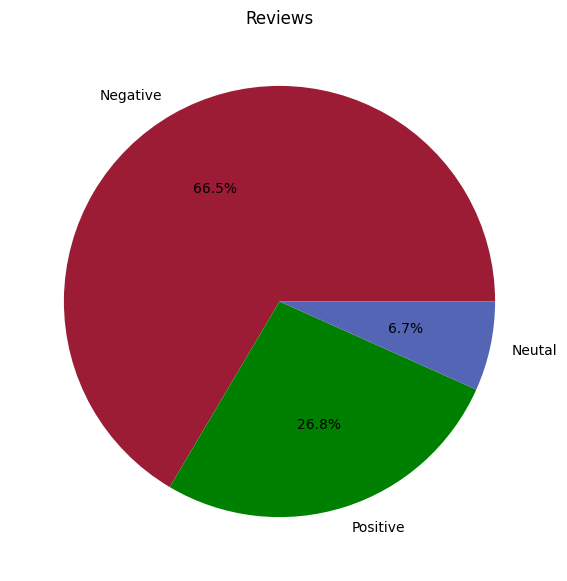

In [80]:
plt.figure(figsize=(7,7))
plt.pie(df["Sentiment"].value_counts(), labels=df["Sentiment"].value_counts().index, autopct="%1.1f%%", colors=["#9b1c34","Green","#5365b4"])
plt.title("Reviews")
plt.show()